In [133]:
import ftfy
import pandas as pd
import json
import re

# row scolling
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)

In [134]:
labeled_dataset_path = '../data/dataset_penyisihan_bdc_2024.xlsx'
unlabeled_dataset_path = '../data/dataset_unlabeled_penyisihan_bdc_2024.xlsx'

labeled_df = pd.read_excel(labeled_dataset_path)
unlabeled_df = pd.read_excel(unlabeled_dataset_path)

print(f"Length Labeled Dataset: {len(labeled_df)}")
print(f"Length Unlabeled Dataset: {len(unlabeled_df)}")

Length Labeled Dataset: 5000
Length Unlabeled Dataset: 1000


In [135]:
labeled_df['clean_text'] = labeled_df['text'].apply(ftfy.fix_text)
unlabeled_df['clean_text'] = unlabeled_df['Text'].apply(ftfy.fix_text)

In [136]:
labeled_df

,text,label,clean_text
0,Kunjungan Prabowo ini untuk meresmikan dan menyerahkan proyek bantuan air bersih di lima titik. #IndonesiaSentris #IndonesiaHijau #02Melanjutkan #AnakMudaIndonesiaEmas Prabowo Subianto,Sumber Daya Alam,Kunjungan Prabowo ini untuk meresmikan dan menyerahkan proyek bantuan air bersih di lima titik. #IndonesiaSentris #IndonesiaHijau #02Melanjutkan #AnakMudaIndonesiaEmas Prabowo Subianto
1,RT Anies dapat tepuk tangan meriah saat jadi Rektor mewajibkan mata kuliah anti-korupsi untuk memutus mata rantai korupsi.. #AminMiskinkanKoruptor https://t.co/hgXsoQGaEa [RE ekowboy2],Politik,RT Anies dapat tepuk tangan meriah saat jadi Rektor mewajibkan mata kuliah anti-korupsi untuk memutus mata rantai korupsi.. #AminMiskinkanKoruptor https://t.co/hgXsoQGaEa [RE ekowboy2]
2,"@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= emng bener sih, pendukung 01 ada yg goblok, begitu jg dg pendukung 02.. hnya sj menurut pak Ridwan Kamil skemanya terbalik, klo 01 MAYORITAS PENDIDIKAN MENENGAH ATAS (artinya ada jg pendidikan rendah yg milih",Demografi,"@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= emng bener sih, pendukung 01 ada yg goblok, begitu jg dg pendukung 02.. hnya sj menurut pak Ridwan Kamil skemanya terbalik, klo 01 MAYORITAS PENDIDIKAN MENENGAH ATAS (artinya ada jg pendidikan rendah yg milih"
3,"RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7Q= Sewaktu anies bersikap kritis ke kinerja pak prabowo dianggap engga sopan karena dianggap kurang menghormati orang tua, giliran skrg gibran yg tengil dan sok kritis malah dianggap kritis dan keras. Apakah ini tidak standar ganda? ÃƒÂ°Ã‚Å¸Ã‚Â¤Ã‚Â­ [RE coldthem]",Politik,"RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7Q= Sewaktu anies bersikap kritis ke kinerja pak prabowo dianggap engga sopan karena dianggap kurang menghormati orang tua, giliran skrg gibran yg tengil dan sok kritis malah dianggap kritis dan keras. Apakah ini tidak standar ganda? 🤭 [RE coldthem]"
4,Anies Baswedan Harap ASN termasuk TNI dan Polri Pegang Sumpahnya dalam Pemilu https://t.co/QRQZ3wI8YP,Politik,Anies Baswedan Harap ASN termasuk TNI dan Polri Pegang Sumpahnya dalam Pemilu https://t.co/QRQZ3wI8YP
...,...,...,...
4995,"RT @l1DsGGe2xObT3t72dHwqlT58X7jvEYtEnauZIZSYwSo= Ngeliat debat kemaren pas prabowo kicep, kekira keluarga yg biasa lakukan Aksi Kamisan di depan istana : ? [RE BinNuh_]",Politik,"RT @l1DsGGe2xObT3t72dHwqlT58X7jvEYtEnauZIZSYwSo= Ngeliat debat kemaren pas prabowo kicep, kekira keluarga yg biasa lakukan Aksi Kamisan di depan istana : ? [RE BinNuh_]"
4996,Masyarakat yakin bahwa Prabowo-Gibran memiliki visi yang sejalan dengan aspirasi rakyat. #KosongDuaSatuPutaran RakyatSenang 02Menang https://t.co/AEQ3e9oPCH,Politik,Masyarakat yakin bahwa Prabowo-Gibran memiliki visi yang sejalan dengan aspirasi rakyat. #KosongDuaSatuPutaran RakyatSenang 02Menang https://t.co/AEQ3e9oPCH
4997,imo both are irrational but yg satu jauh lebih irrational tbh. but nevertheless dua duanya mesti diluruskan dan baik anies dan ahok KUDU TERLIBAT LANGSUNG untuk validasi trauma mereka. dengan empati lho ya. gitu ae sih.,Ekonomi,imo both are irrational but yg satu jauh lebih irrational tbh. but nevertheless dua duanya mesti diluruskan dan baik anies dan ahok KUDU TERLIBAT LANGSUNG untuk validasi trauma mereka. dengan empati lho ya. gitu ae sih.
4998,"@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= look at that pak ganjar, anda sdh berkecimpung di lgislatif, eksekutif bhkan capres saja mamatGS brani mngmcam, ancaman itu nyata pak ganjar, nyalakan tanda bahaya utk OPM (operasi Persenjataan Mamat)",Pertahanan dan Keamanan,"@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= look at that pak ganjar, anda sdh berkecimpung di lgislatif, eksekutif bhkan capres saja mamatGS brani mngmcam, ancaman itu nyata pak ganjar, nyalakan tanda bahaya utk OPM (operasi Persenjataan Mamat)"


In [137]:
# Load the dictionary from the specified path
with open('../data/dictionary.json', 'r') as f:
    dictionary = json.load(f)

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Hilangkan spasi berlebih
    text = re.sub(r'http\S+', '', text)  # Hilangkan URL
    text = re.sub(r'@[^ ]+', '', text)  # Hilangkan mention
    # text = re.sub(r'#[^ ]+', '', text)  # Hilangkan hashtag
    text = re.sub(r'\[RE [\w\W]+\]', '', text)  # Reply specifier
    text = re.sub(r'RT\s+', '', text)  # Hilangkan retweet specifier
    text = re.sub(r'\[RT [\w\W]+\]', '', text)  # Retweet specifier
    text = re.sub(r'\[rt [\w\W]+\]', '', text)  # Retweet specifier
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Hilangkan karakter khusus
    text = text.replace("yg", "yang")
    text = text.replace("prabowogibran", "prabowo gibran")
    text = text.replace("ganjarmahfud", "ganjar mahfud")
    text = text.lower()   # Ubah ke huruf kecil

    # Ubah singkatan menjadi kata aslinya menggunakan mapping dictionary.json
    for key in dictionary:
        text = re.sub(r'\b' + key + r'\b', dictionary[key], text)

    return text

In [138]:
labeled_df['clean_text'] = labeled_df['clean_text'].apply(clean_text)
unlabeled_df['clean_text'] = unlabeled_df['clean_text'].apply(clean_text)

In [139]:
print(labeled_df['clean_text'][1])

anies dapat tepuk tangan meriah saat jadi rektor mewajibkan mata kuliah antikorupsi untuk memutus mata rantai korupsi aminmiskinkankoruptor  


In [140]:
# cari kata `aminmiskinkankoruptor` di unlabeled dataset
print(labeled_df[labeled_df['clean_text'].str.contains('komisi pemberantasan korupsi')])

In [141]:
# drop duplicate rows
labeled_df.drop_duplicates(subset=['clean_text'], inplace=True)

print(f"Length Labeled Dataset: {len(labeled_df)}")

Length Labeled Dataset: 4284


In [142]:
# stopword removal

with open('../data/combined_stop_words.txt', 'r') as f:
    stopwords = f.read().splitlines()

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stopwords])

labeled_df['clean_text'] = labeled_df['clean_text'].apply(remove_stopwords)
unlabeled_df['clean_text'] = unlabeled_df['clean_text'].apply(remove_stopwords)

In [143]:
# jumlah row yang cuman ada 50 karakter
print(len(labeled_df[labeled_df['clean_text'].str.len() < 50]))
# buat dataframe baru yang hanya berisi row yang panjangnya kurang dari 50 karakter
short_text_df = labeled_df[labeled_df['clean_text'].str.len() < 50]
# tampilkan clean_text dan label saja
short_text_df[['clean_text', 'label']]

188


,clean_text,label
7,anies allah sibukkanlah zalim kejahatan zalim,Politik
14,pendapatan apbd jumbo seindonesia mencapai rp,Ekonomi
28,anies selera masyarakat sumatera barat,Sosial Budaya
54,tanah bob hasan dimiliki prabowo,Politik
69,pendukung anies ramaikan lokasi kampanye,Politik
74,,Sosial Budaya
96,anies kreatif bawa isu panggung pilpres,Politik
123,anies kesetaraan pendidikan salah diperjuangkan,Ideologi
127,melawan framing anies jualan politik identitas,Politik
130,papua berharap anies presiden,Sosial Budaya


In [157]:
print(labeled_df['text'][4942])

RT Jawaban pak Anies tentang HTI dan FPI https://t.co/qMIj8kLGqm [RE Yurissa_Samosir]


In [144]:
# cek index ke 74
print(labeled_df['text'][74])
print(labeled_df['clean_text'][74]) # malah kosong

@+0HCSSnYXfZ/WiNzDKgSO08o/BKbymxlncndey4/N+E= @M61KgouH2JD4MMFLGZBhfG5ocln03Am625DmaZpKSYA= @9FbwEWDjW6JytQuu1xGP0wVid7bjHZCdeJyqTuewIx4= @ayXKEw8+J7ttUaxREMDLxvHtdJNBD5A7dnMunfd/bwA= @jYOrNzbQHYii1Oepe9IeSjjbM0AFalF7fuAb6z9FsIg= @uVsdeC4fpmwdNpQ1oJaoD2oU



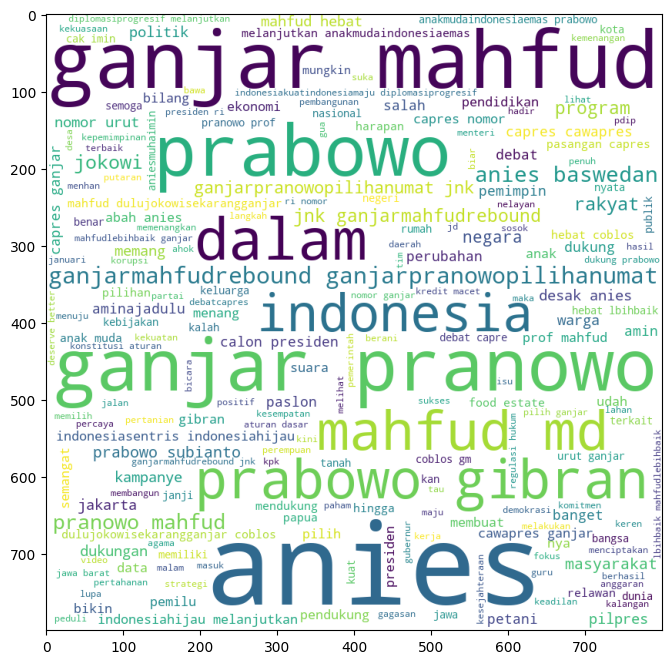

In [145]:
# workcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(labeled_df['clean_text']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

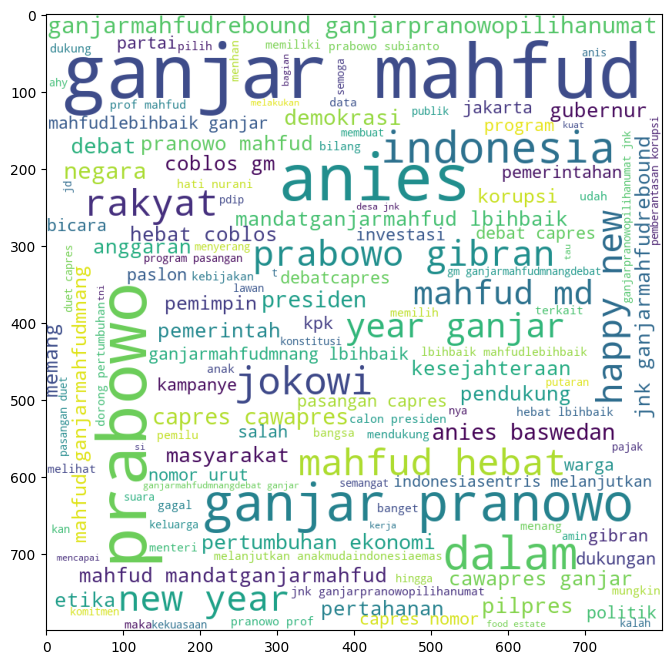

In [146]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(unlabeled_df['clean_text']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

In [158]:
# simpan ke file
labeled_df.to_excel('../data/cleaned_labeled_dataset.xlsx', index=False)
unlabeled_df.to_excel('../data/cleaned_unlabeled_dataset.xlsx', index=False)